In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tslearn.clustering import KShape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

def ExtractOver1000median(names):
    for i in names:
        median = convert_week_datetime(i).median()
        if median['downloads'] >= 1000:
            print(i)



In [64]:
# 中央値が 1000 を超えるものを抽出
for i in []:
  median = convert_week_datetime(i).median()
  if median['downloads'] >= 1000:
      print(i)

chai
jest
karma
jest-cli
enzyme
supertest
selenium-webdriver
nyc
ts-jest
protractor
enzyme-adapter-react-16
chai-as-promised
deep-eql
enzyme-to-json
sinon-chai
axe-core
cypress
cucumber
ava
webdriver-manager
json-server
browserstack
gulp-mocha
enzyme-adapter-utils
newman
fetch-mock
karma-firefox-launcher
nise
wd
karma-cli
angular-mocks
jest-enzyme
jasminewd2
tap
blocking-proxy
webdriver-js-extender


y. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framewor

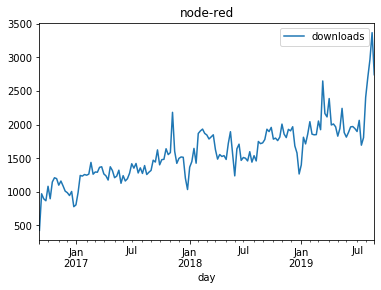

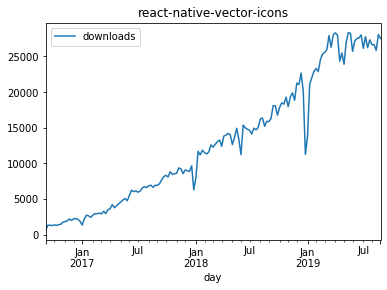

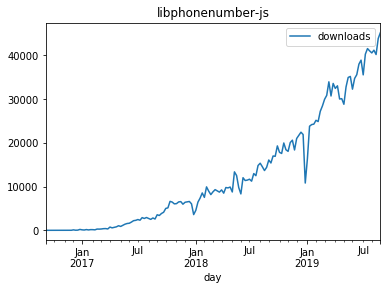

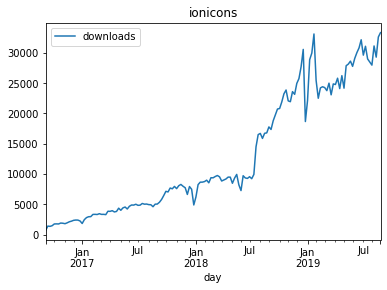

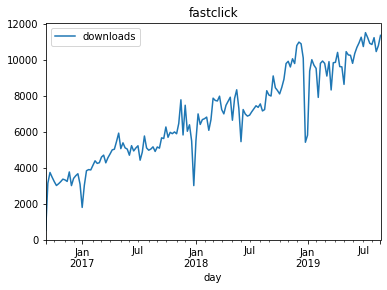

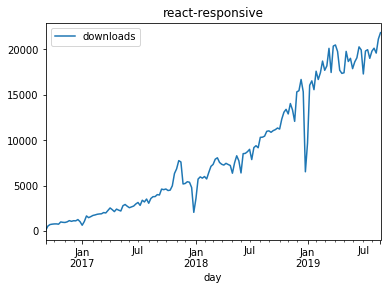

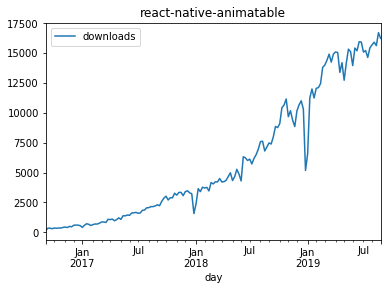

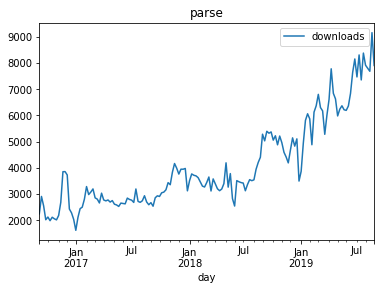

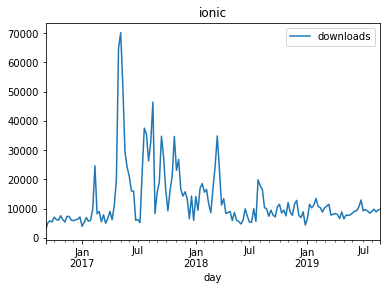

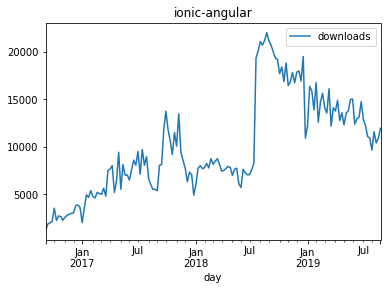

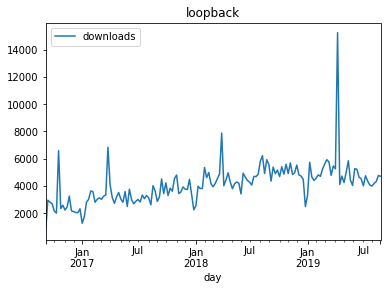

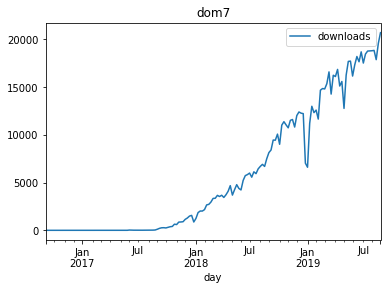

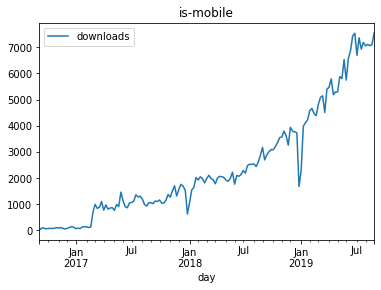

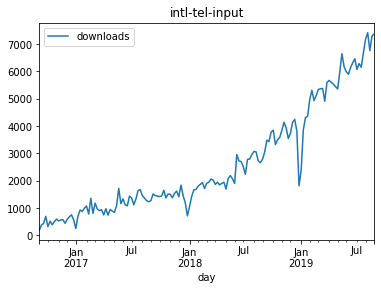

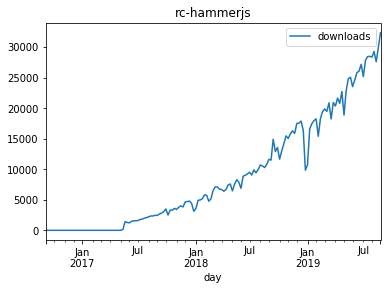

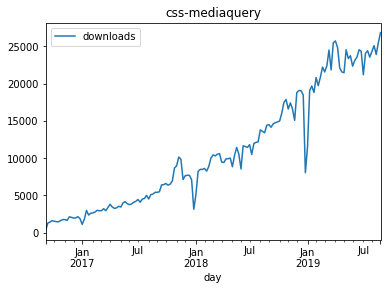

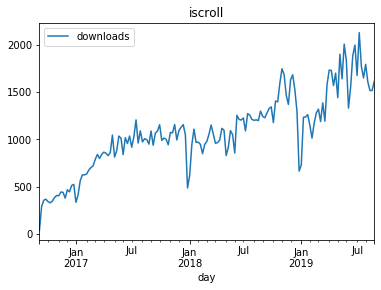

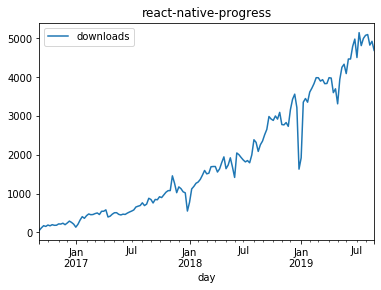

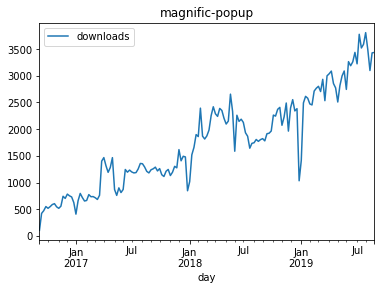

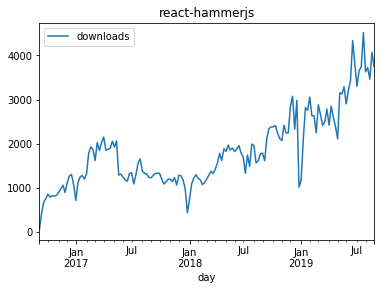

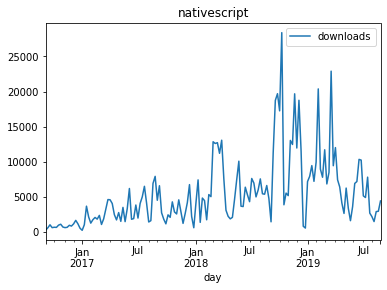

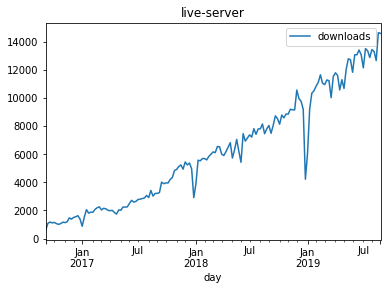

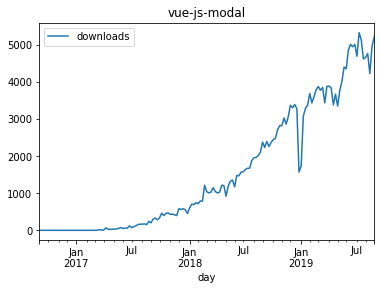

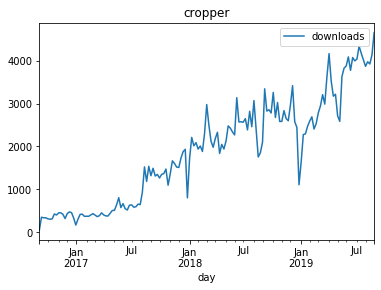

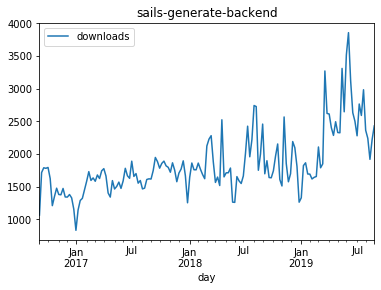

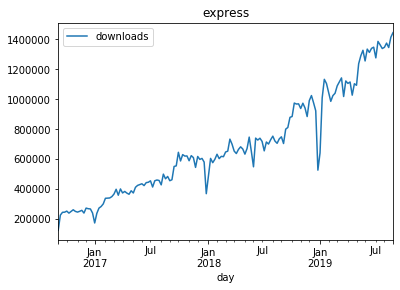

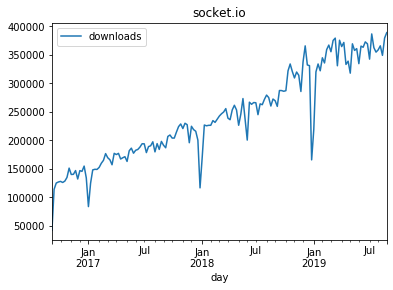

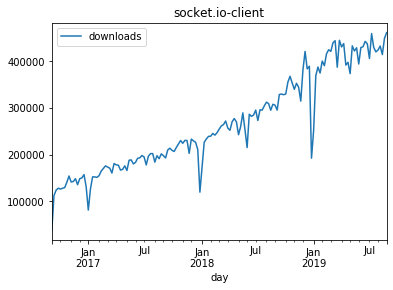

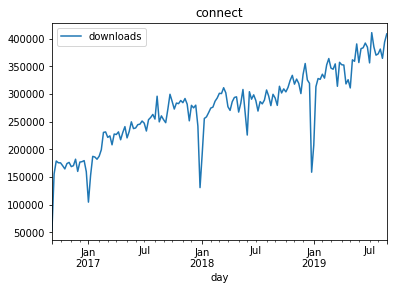

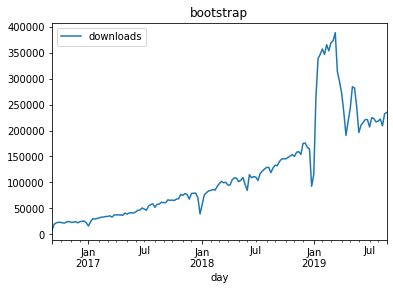

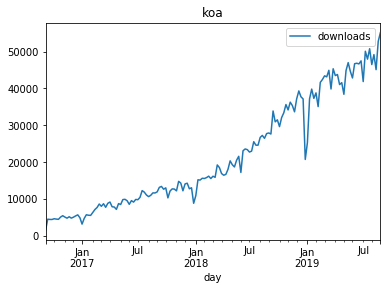

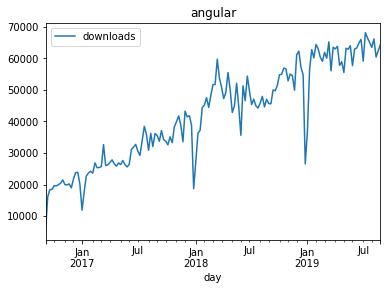

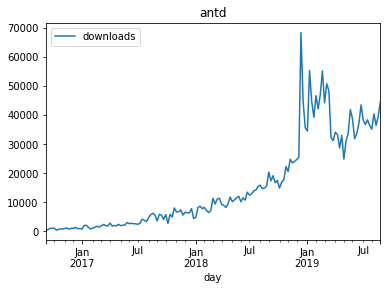

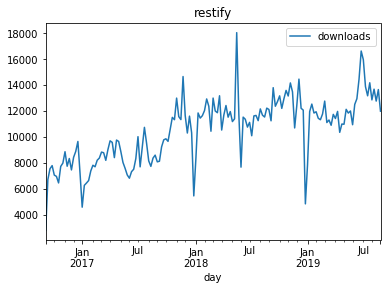

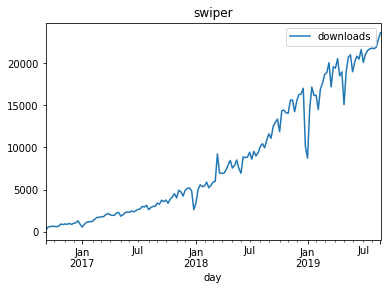

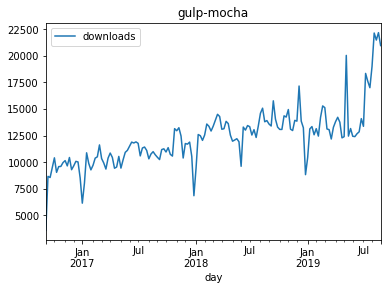

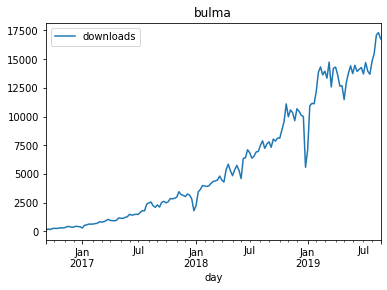

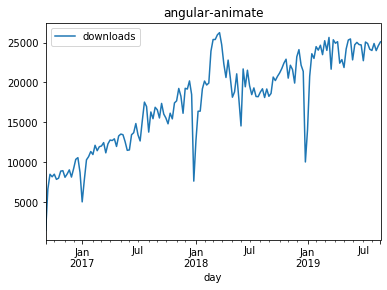

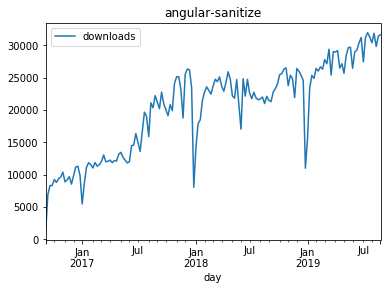

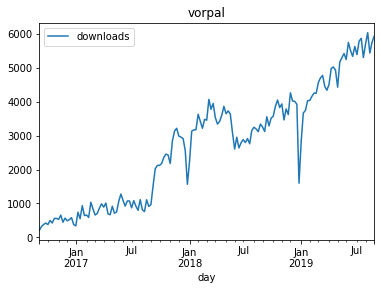

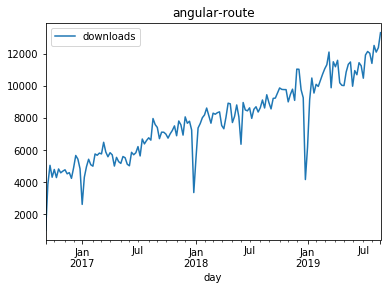

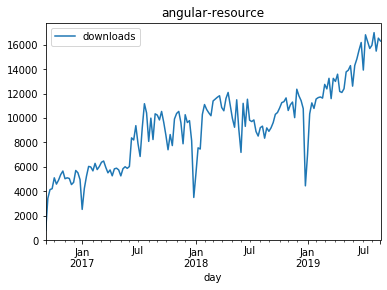

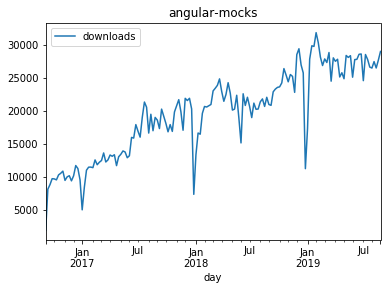

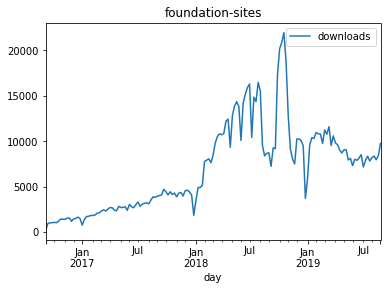

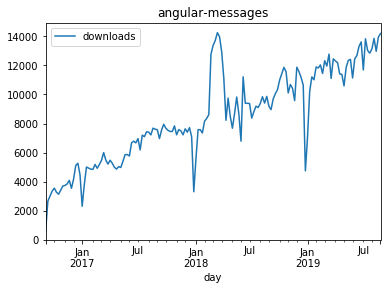

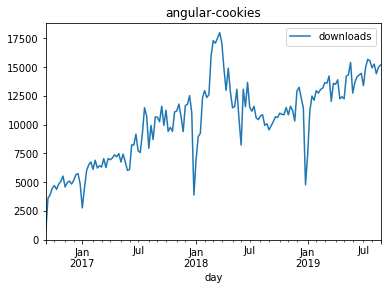

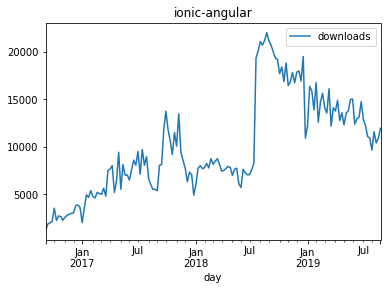

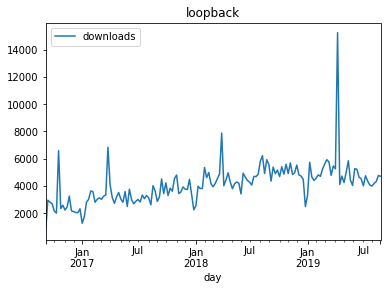

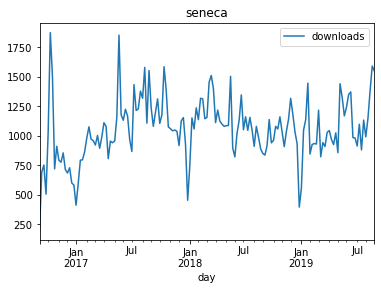

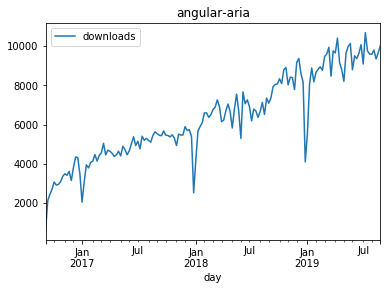

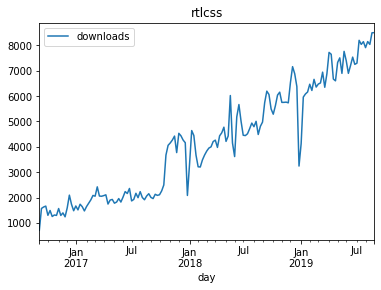

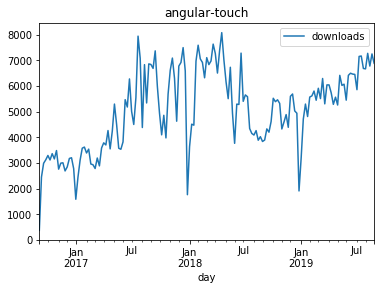

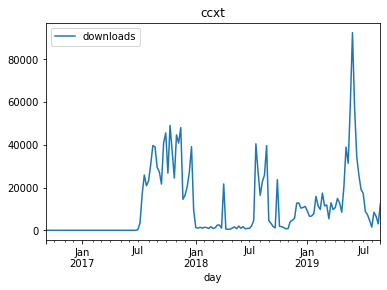

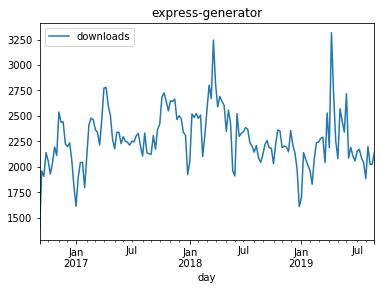

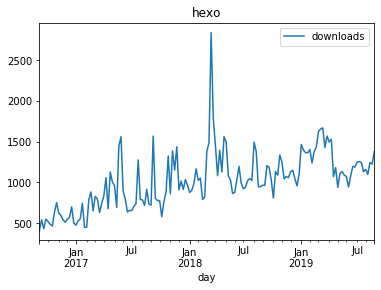

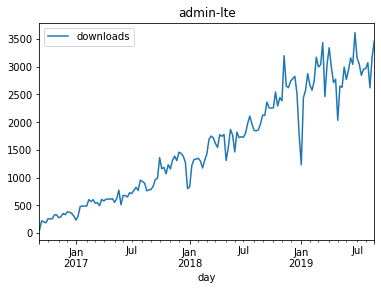

In [61]:
assets = pd.read_json('data/assets/over1000packages.json')
for i in assets.values:
    convert_week_datetime(i[0]).plot(title=i[0])


y. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framewor

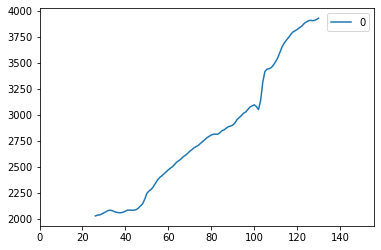

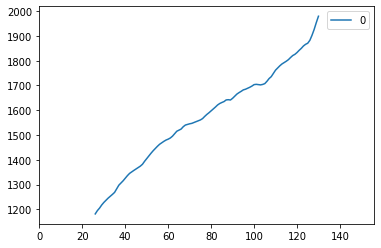

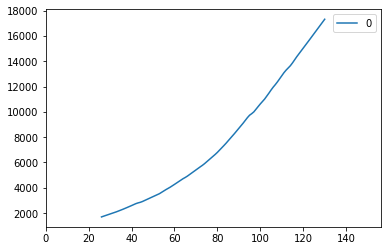

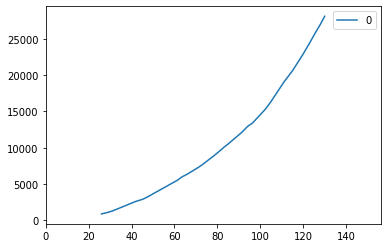

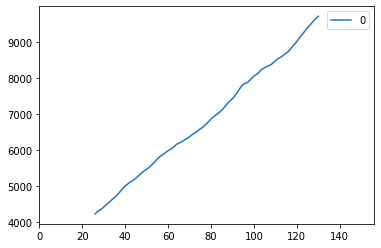

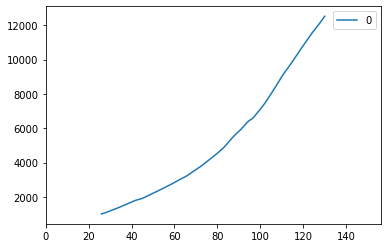

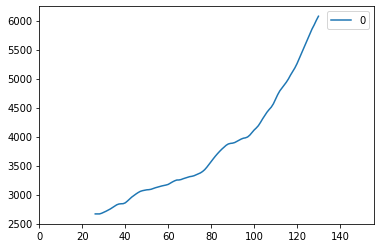

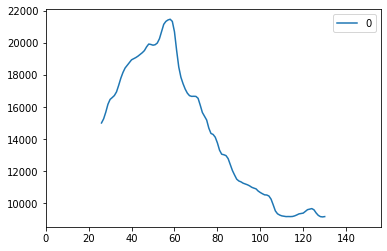

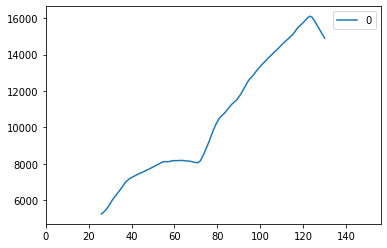

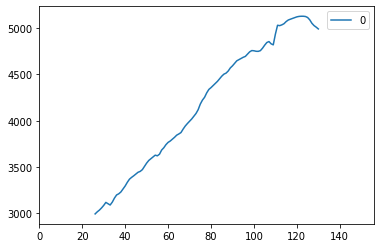

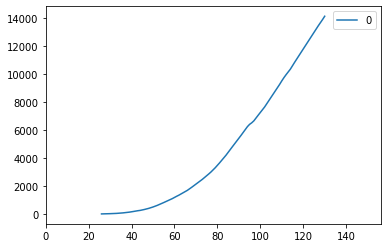

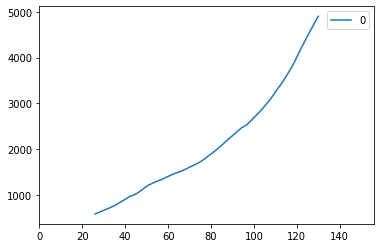

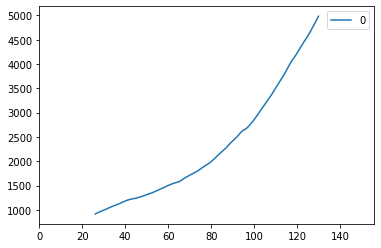

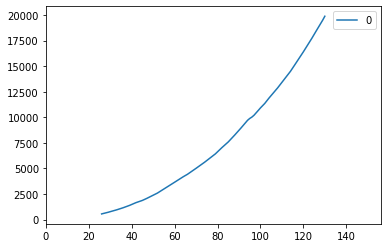

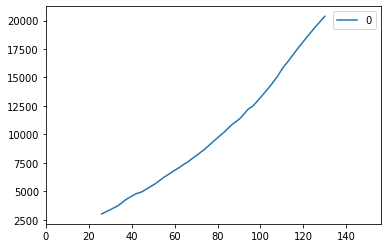

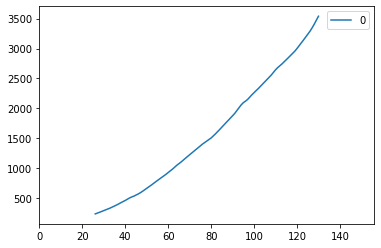

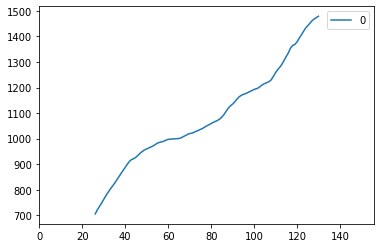

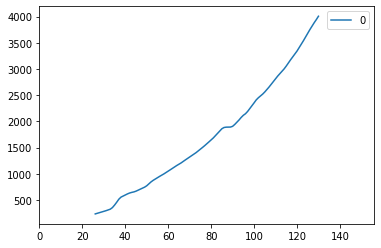

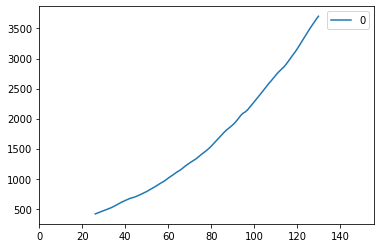

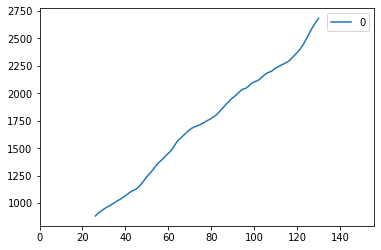

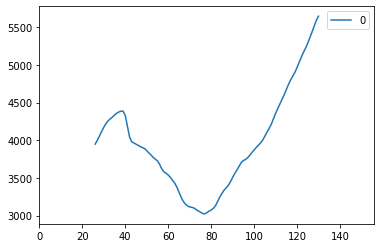

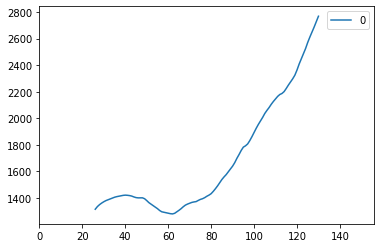

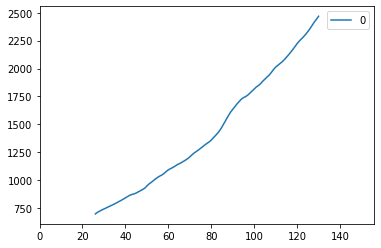

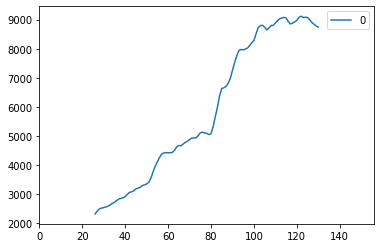

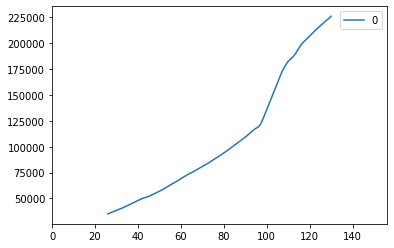

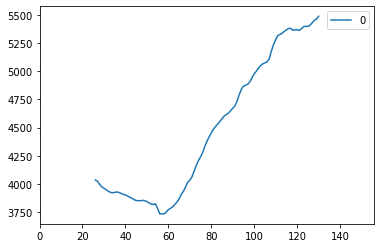

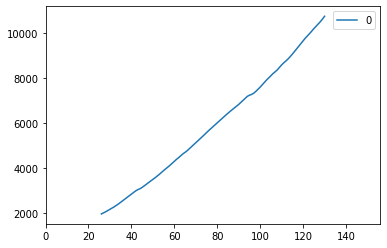

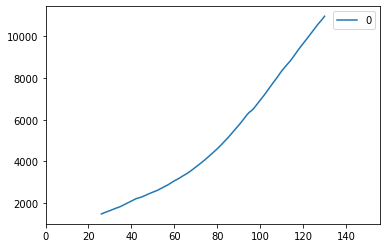

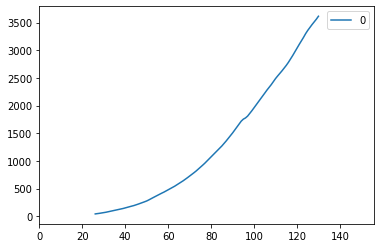

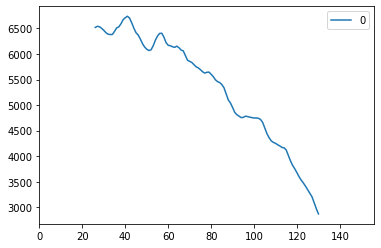

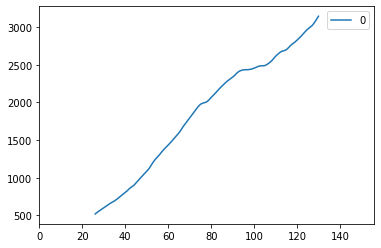

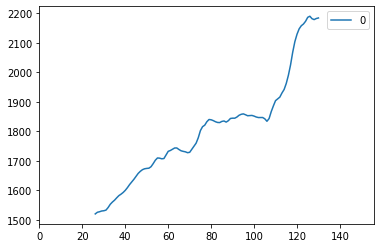

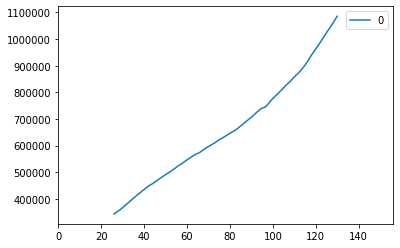

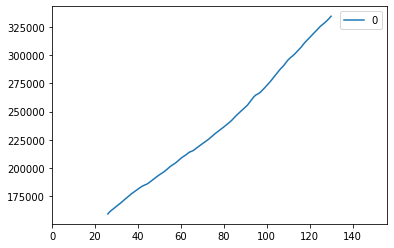

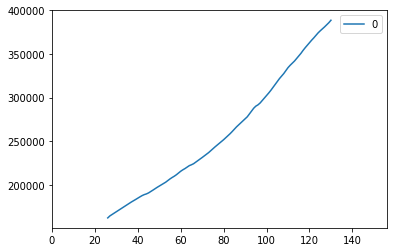

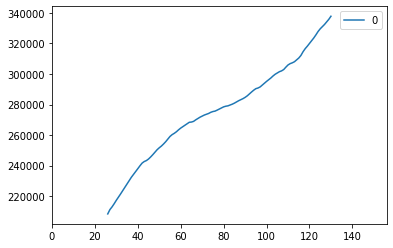

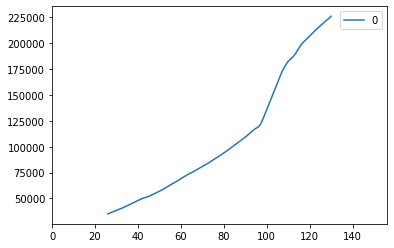

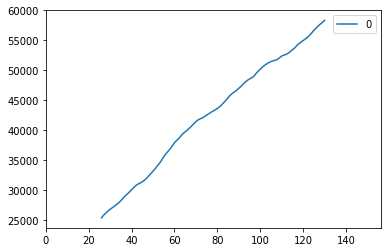

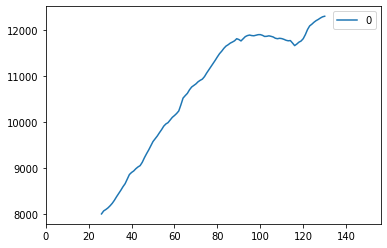

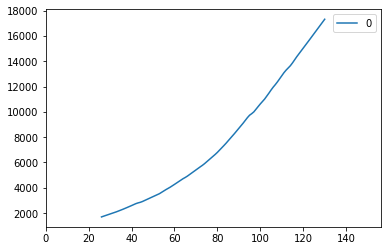

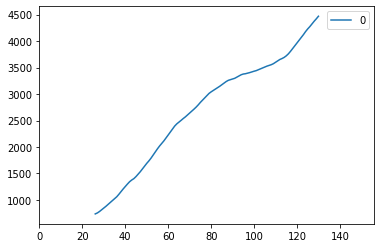

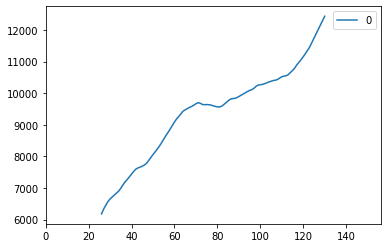

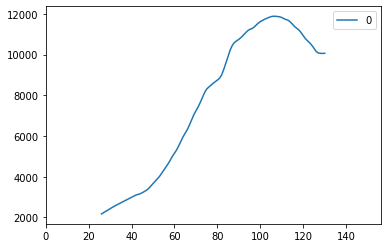

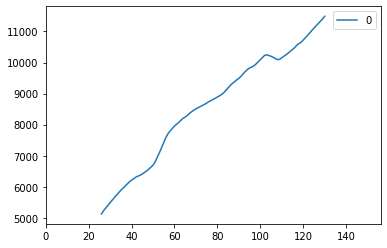

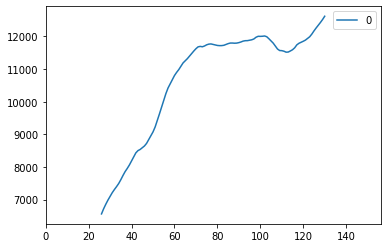

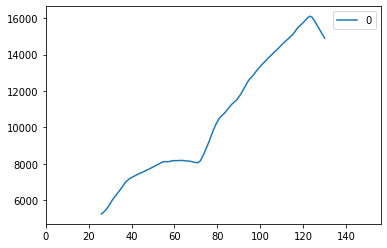

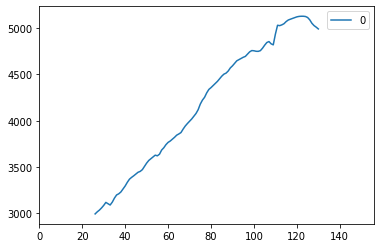

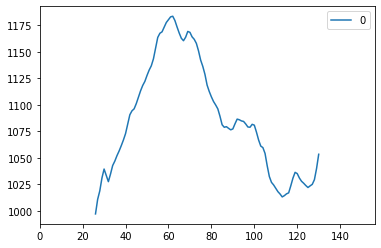

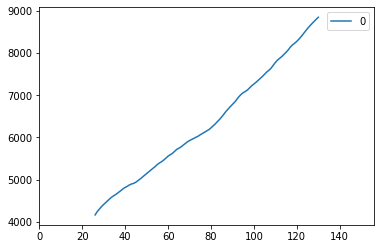

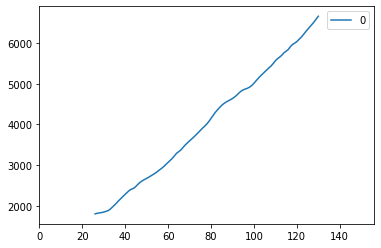

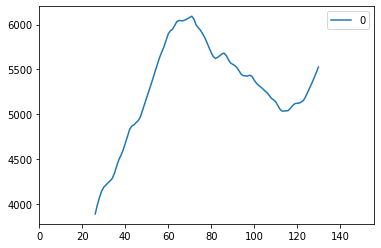

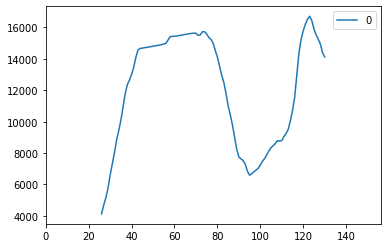

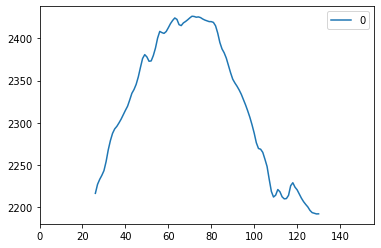

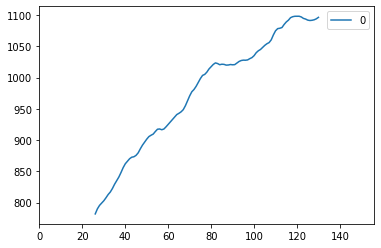

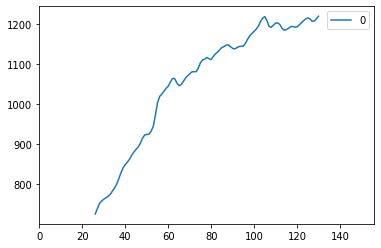

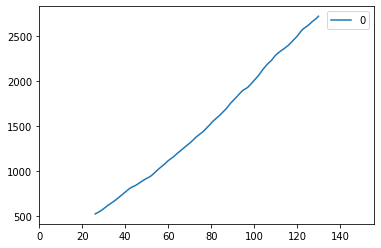

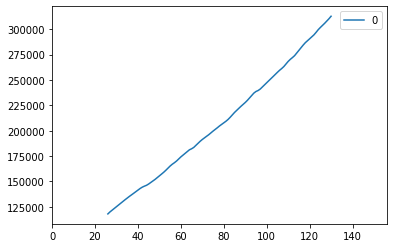

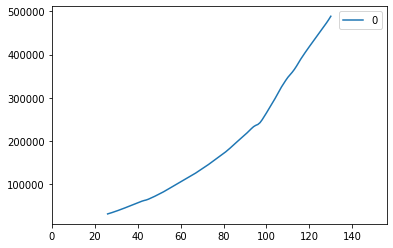

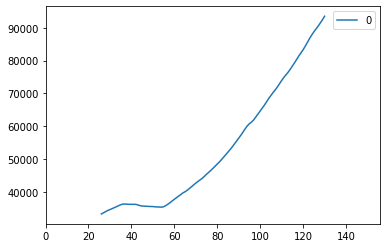

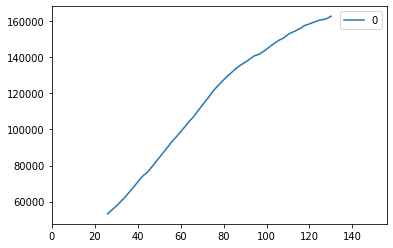

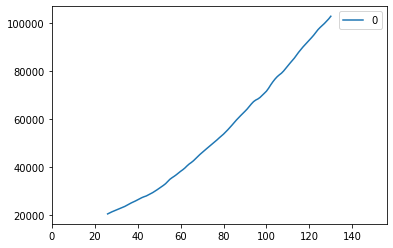

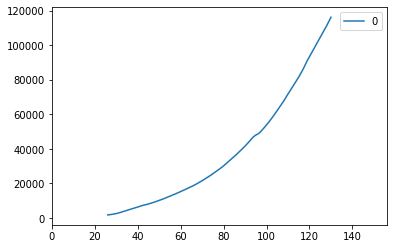

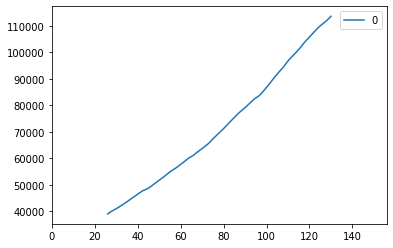

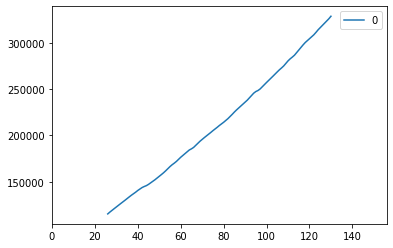

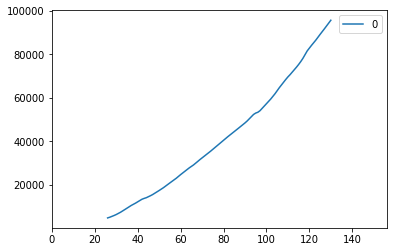

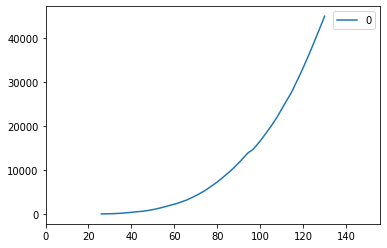

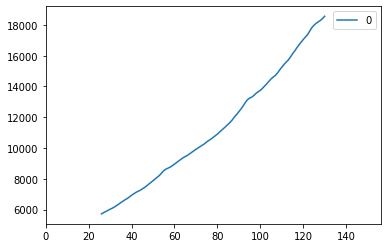

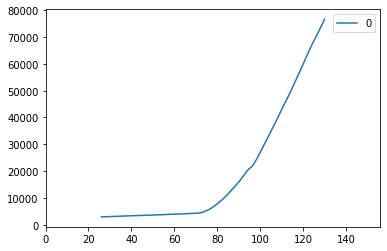

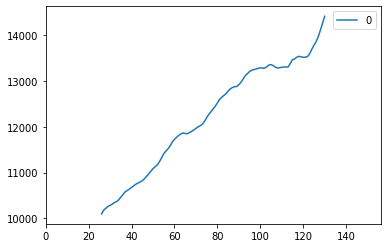

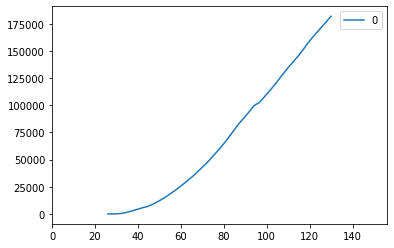

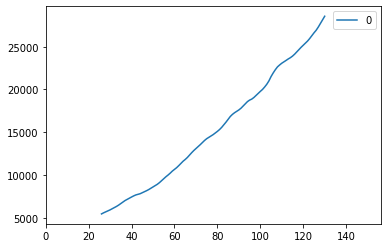

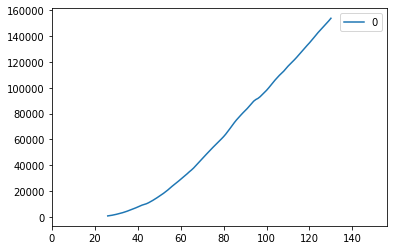

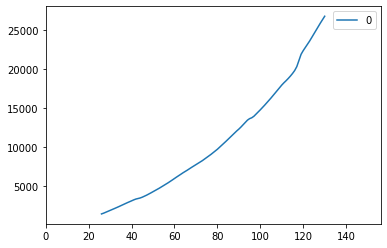

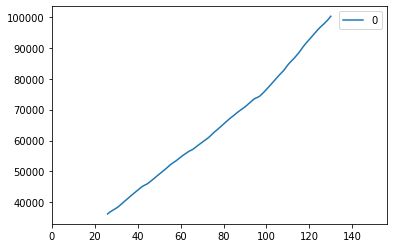

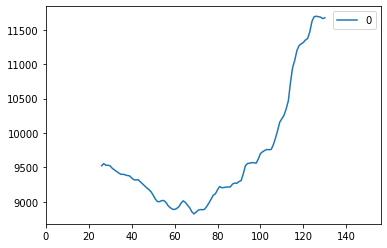

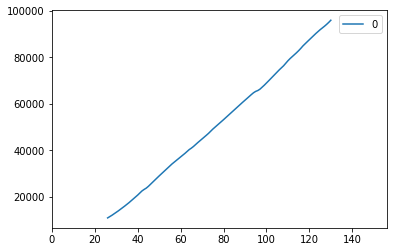

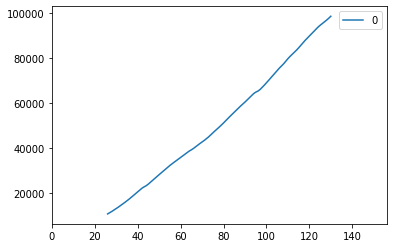

In [4]:
assets = pd.read_json('data/assets/over1000packages.json')
for i in assets.values:
    ts = convert_ts(i[0])
    df = pd.DataFrame(ts.trend)
    df.plot(title=i[0])


In [ ]:
# あとは上記データを kmeans クラスタリングすればいいだけ
# http://irukanobox.blogspot.com/2019/05/python.html